<a href="https://colab.research.google.com/github/RafaelRamos19/Classifica-o-com-keras/blob/main/Classifica%C3%A7%C3%A3o_com_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
import numpy as np

In [ ]:
dataset = keras.datasets.fashion_mnist #pegando dataset dentro da biblioteca
dataset.load_data()

4431872/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

O dataset é separado em dados de treino e de teste, na próxima célula cada parte é colocada em um atributo

In [ ]:
((imagens_treino,identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

In [ ]:
imagens_treino


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### Visualizando as imagens com matplotlib

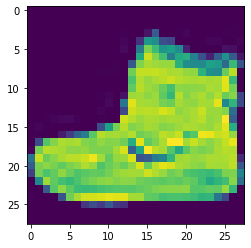

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(imagens_treino[0])

Cada imagem possui uma numeração de identificação, esse número é de 1 a 10, ou seja, existem 10 tipos diferentes de roupas no dataset

In [ ]:
nome_de_classificacoes = ['Camiseta', 
'Calca','Pullover','Vestido','Casaco','Sandalia','Camisa','Tênis','Bolsa','Bota']

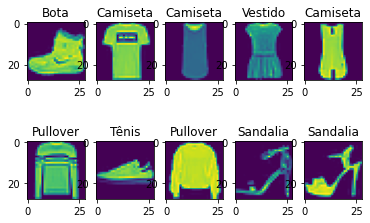

In [ ]:
for imagem in range(10):
  plt.subplot(2,5,imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_de_classificacoes[identificacoes_treino[imagem]])

Em deep learning existe a entrada, o processamento e a saída em sequêmcia, todas essas etapas fazem parte do modelo (diferente do machine learning)

#Organizando modelo

### Camada 0
Nesse momento as imagens (como visto antes elas possuem 28 pixels) serão pegas. Elas estão no formato de array de dimensão 28X28, ou seja, 28 linhas e 28 colunas, nessa camada o keras irá achatar essas imagens deixando-as com uma linha e 28 colunas, ou seja, irá reorganizar cada imagem e a função trabalhar com cada pixel separado

In [ ]:
# input_shape = tamanho dos dados de entrada (imagens de 28x28 pixels)
# keras.layers = camadas do keras
# Flatten = achatamento das imagens
entrada = keras.layers.Flatten(input_shape=(28,28)) 

###Camada 1

Esse será uma camada mais densa, chamada de totalmente conectada pois cada função que está responsável por cada pixel irá se comunicar com os demais deixando-as bem conectadas

In [ ]:
#Dense(x, activation) =  função que permite que os pixels se comuniquem com os demais 
#x: numero de funções que queremos colocar na camada para a comunicação entre os pixels
#activation: função que define quando elas serão ativadas (iremos usar uma ja nativa do tensorflow que os progamadores mais usam)
#tensorflow.nn = funções de redes neurais do tensorflow
processamento = keras.layers.Dense(256, activation=tensorflow.nn.relu) 

A relu é usada pois ela não classifica como sendo uma função linear

###Camada 2

In [ ]:
saida = keras.layers.Dense(10, activation=tensorflow.nn.softmax) #10 é o número de classificaçoes nos dados, a quantidade que queremos na saída

O softmax irá retornar a propabilidade da imagem em questão pertencer a alguma categoria

### Criando o modelo

In [ ]:
modelo = keras.Sequential([entrada,processamento,saida])

Esse modelo possui duas camadas

## Treinando o modelo

Antes de treinar o modelo ele deve ser compilado, para isso ele tem os parâmetros de otimizador e de perda

In [ ]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 6s 3ms/step - loss: 3.5746


Tivemos uma perda considerável, porém podemos reduzi-la

###Reduzindo a perda

Começando pela camada zero

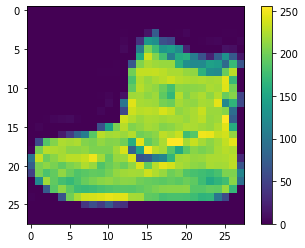

In [ ]:
plt.imshow(imagens_treino[0])
plt.colorbar()

Observe que existe uma variação nas cores de 0 até 250, essa escala pode estar fazendo a perda do algorítmo aumentar. Para isso essas cores deverão ser nomalizadas ficando entre zero e 1, assim cada valor das imagens irá ser dividido pela quantidade total, ou seja 250

In [ ]:
imagens_treino = imagens_treino/255.0

In [ ]:
entrada = keras.layers.Flatten(input_shape=(28,28)) 
processamento = keras.layers.Dense(256, activation=tensorflow.nn.relu) 
saida = keras.layers.Dense(10, activation=tensorflow.nn.softmax)

modelo = keras.Sequential([entrada,processamento,saida])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 [==============================] - 9s 5ms/step - loss: 0.4797


Refazendo o modelo podemos perceber que nossa perda diminuiu drásticamente

Dependendo do modelo a normalização pode ajudar muito a reduzir as perdas. Porém existem modelos que não são otimizados quando sua entrada é normalizada

Para reduzir ainda mais a perda podemos treinar nosso modelo mais vezes 

In [ ]:
entrada = keras.layers.Flatten(input_shape=(28,28)) 
processamento = keras.layers.Dense(256, activation=tensorflow.nn.relu) 
dropout = keras.layers.Dropout(0.2)
saida = keras.layers.Dense(10, activation=tensorflow.nn.softmax)

modelo = keras.Sequential([entrada,processamento,dropout,saida])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
modelo.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5083
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3866
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3538
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3338
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3188


Conseguimos reduzir nossa perda em quase pela metade

Podemos saber ainda mais, o quanto estamos ganhando

In [ ]:
entrada = keras.layers.Flatten(input_shape=(28,28)) 
processamento = keras.layers.Dense(256, activation=tensorflow.nn.relu) 
saida = keras.layers.Dense(10, activation=tensorflow.nn.softmax)

modelo = keras.Sequential([entrada,processamento,saida])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4831 - accuracy: 0.8292
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3641 - accuracy: 0.8680
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3265 - accuracy: 0.8802
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3029 - accuracy: 0.8883
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2837 - accuracy: 0.8954


Como visto nossa acurácia só está aumentando e a perda diminuindo

In [ ]:
testes = modelo.predict(imagens_teste)

In [ ]:
print('resultado do teste:',np.argmax(testes[0]))
print('número da imagem de teste:',identificacoes_teste[0])

resultado do teste: 9
número da imagem de teste: 9


Observe que nesse exemplo a rede neural acertou a imagem

Agora vamos saber como um todo 

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 1s 2ms/step - loss: 53.6792 - accuracy: 0.8692


In [ ]:
print('perda do teste', perda_teste)
print('acurácia do teste', acuracia_teste)

perda do teste 53.67919921875
acurácia do teste 0.8691999912261963


A perda está muito alta, logo ajustes devem ser feitos

Para melhorar podemos deixar dados reservados para a validação

In [ ]:
entrada = keras.layers.Flatten(input_shape=(28,28)) 
processamento = keras.layers.Dense(256, activation=tensorflow.nn.relu) 
saida = keras.layers.Dense(10, activation=tensorflow.nn.softmax)

modelo = keras.Sequential([entrada,processamento,saida])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4986 - accuracy: 0.8243 - val_loss: 0.4109 - val_accuracy: 0.8557
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3748 - accuracy: 0.8629 - val_loss: 0.3656 - val_accuracy: 0.8655
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3337 - accuracy: 0.8782 - val_loss: 0.3643 - val_accuracy: 0.8690
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3084 - accuracy: 0.8861 - val_loss: 0.3534 - val_accuracy: 0.8719
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2898 - accuracy: 0.8927 - val_loss: 0.3366 - val_accuracy: 0.8786


val_loss: 0.3338 - val_accuracy: 0.8777 são os de validação, percebemos que a perda deles está diminuindo e a acurácia aumentando

Vamos fazer um gráfico com isso

In [ ]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2762 - accuracy: 0.8973 - val_loss: 0.3219 - val_accuracy: 0.8854
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2608 - accuracy: 0.9025 - val_loss: 0.3253 - val_accuracy: 0.8837
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2506 - accuracy: 0.9064 - val_loss: 0.3143 - val_accuracy: 0.8878
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2414 - accuracy: 0.9092 - val_loss: 0.3118 - val_accuracy: 0.8907
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2296 - accuracy: 0.9139 - val_loss: 0.3267 - val_accuracy: 0.8873


In [ ]:
historico.history

{'accuracy': [0.8972708582878113,
  0.9025416374206543,
  0.9063541889190674,
  0.909208357334137,
  0.9139166474342346],
 'loss': [0.27623385190963745,
  0.2607918977737427,
  0.2505947947502136,
  0.24139048159122467,
  0.22961834073066711],
 'val_accuracy': [0.8854166865348816,
  0.8836666941642761,
  0.8878333568572998,
  0.890666663646698,
  0.887333333492279],
 'val_loss': [0.32185959815979004,
  0.3253405690193176,
  0.31432491540908813,
  0.3118138909339905,
  0.32669752836227417]}

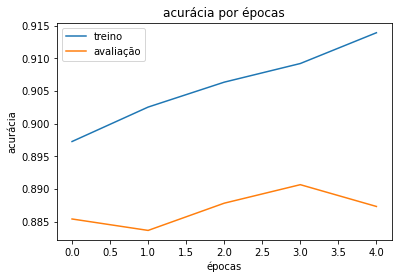

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','avaliação'])

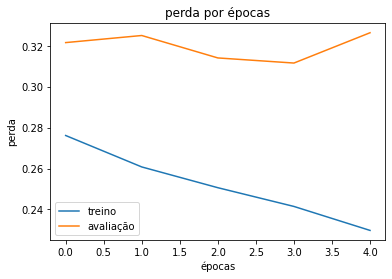

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino','avaliação'])

#Salvando o modelo

In [ ]:
entrada = keras.layers.Flatten(input_shape=(28,28)) 
processamento = keras.layers.Dense(256, activation=tensorflow.nn.relu) 
saida = keras.layers.Dense(10, activation=tensorflow.nn.softmax)

modelo = keras.Sequential([entrada,processamento,saida])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4986 - accuracy: 0.8242 - val_loss: 0.4015 - val_accuracy: 0.8572
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3729 - accuracy: 0.8645 - val_loss: 0.3622 - val_accuracy: 0.8708
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3371 - accuracy: 0.8752 - val_loss: 0.3338 - val_accuracy: 0.8820
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3101 - accuracy: 0.8866 - val_loss: 0.3306 - val_accuracy: 0.8798
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2908 - accuracy: 0.8934 - val_loss: 0.3410 - val_accuracy: 0.8763


In [ ]:
modelo.save('modelo.h5')

A extenssão h5 é usada quando se está tarbalhando com muitos dados

In [ ]:
from tensorflow.keras.models import load_model
# para usa-lo
modelo_salvo = load_model('modelo.h5')

#Parte 2
aprofundamento nos modelos de deep learning

In [ ]:
sumario_do_modelo = modelo.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pesos_da_camada_dense = modelo.layers[1].get_weights()[0]
pesos_da_camada_dense

array([[ 4.18230556e-02,  4.11534235e-02,  1.02208562e-01, ...,
        -8.02800059e-05, -5.86554669e-02, -7.21646622e-02],
       [-4.24603671e-02, -1.72456505e-03, -9.70155001e-03, ...,
        -3.26907746e-02,  1.39726396e-03,  7.11572319e-02],
       [ 4.10867557e-02, -1.08969375e-01,  2.53845125e-01, ...,
         2.40718946e-02,  5.81228286e-02,  1.30574778e-01],
       ...,
       [-1.71615615e-01, -6.47348464e-02,  2.46665403e-01, ...,
        -7.09123239e-02,  3.81428264e-02,  1.34169772e-01],
       [-4.19808105e-02,  2.12613091e-01,  3.51087451e-01, ...,
        -5.02296910e-02,  4.58788220e-03, -3.05442419e-02],
       [-1.90712377e-01,  1.42244816e-01,  2.00149298e-01, ...,
        -3.48975286e-02, -4.05870145e-03,  4.31152284e-02]], dtype=float32)

Esses são os pesos das camadas, eles estão em matrizes que estão sendo multiplicadas
Os pesos “privilegiam” aspectos das nossas imagens que as diferem umas das outras

Observe que a matriz se modeifica dependendo do indice

In [ ]:
pesos_da_camada_dense

array([[ 4.18230556e-02,  4.11534235e-02,  1.02208562e-01, ...,
        -8.02800059e-05, -5.86554669e-02, -7.21646622e-02],
       [-4.24603671e-02, -1.72456505e-03, -9.70155001e-03, ...,
        -3.26907746e-02,  1.39726396e-03,  7.11572319e-02],
       [ 4.10867557e-02, -1.08969375e-01,  2.53845125e-01, ...,
         2.40718946e-02,  5.81228286e-02,  1.30574778e-01],
       ...,
       [-1.71615615e-01, -6.47348464e-02,  2.46665403e-01, ...,
        -7.09123239e-02,  3.81428264e-02,  1.34169772e-01],
       [-4.19808105e-02,  2.12613091e-01,  3.51087451e-01, ...,
        -5.02296910e-02,  4.58788220e-03, -3.05442419e-02],
       [-1.90712377e-01,  1.42244816e-01,  2.00149298e-01, ...,
        -3.48975286e-02, -4.05870145e-03,  4.31152284e-02]], dtype=float32)

In [ ]:
 modelo.layers[1].get_weights()[1]

array([ 0.16182603,  0.03688628,  0.13780706,  0.22594665,  0.15565048,
       -0.23148802, -0.06149311,  0.2545399 , -0.01428161,  0.05093638,
        0.16909991,  0.09163439,  0.14832845,  0.02725017,  0.29016957,
        0.28512403, -0.01537404,  0.07361871,  0.10497025, -0.22086516,
        0.14939477,  0.28539696, -0.24988167,  0.03879045, -0.00729059,
        0.11980738,  0.41692495,  0.21892862,  0.3971855 ,  0.25690266,
       -0.19380185,  0.2154763 , -0.278956  ,  0.1906562 ,  0.00944658,
        0.19010025, -0.01757498, -0.00593794,  0.1042228 ,  0.02439768,
       -0.00776927,  0.2633677 , -0.01390479, -0.00738751,  0.05972525,
        0.01035678,  0.16632196,  0.18961278, -0.16156466,  0.15662615,
        0.32435435, -0.3617877 ,  0.2043934 ,  0.24929337,  0.05575561,
        0.13614665,  0.02808714,  0.52822584,  0.0372765 ,  0.26277038,
       -0.00672182,  0.20496318,  0.22406478,  0.19534732,  0.23803098,
       -0.01431564, -0.0356326 , -0.27539814, -0.22407433, -0.21

Quanto mais um modelo está se aproximando de um resultado indesejado maior é seu viese, e quanto mais próximo ele estiver do valor desejado menor será ele. Portanto o pesos_da_camada_dense[1] é o viese do nosso modelo

In [ ]:
vieses_da_camada_dense =  modelo.layers[1].get_weights()[1]
vieses_da_camada_dense

array([ 0.16182603,  0.03688628,  0.13780706,  0.22594665,  0.15565048,
       -0.23148802, -0.06149311,  0.2545399 , -0.01428161,  0.05093638,
        0.16909991,  0.09163439,  0.14832845,  0.02725017,  0.29016957,
        0.28512403, -0.01537404,  0.07361871,  0.10497025, -0.22086516,
        0.14939477,  0.28539696, -0.24988167,  0.03879045, -0.00729059,
        0.11980738,  0.41692495,  0.21892862,  0.3971855 ,  0.25690266,
       -0.19380185,  0.2154763 , -0.278956  ,  0.1906562 ,  0.00944658,
        0.19010025, -0.01757498, -0.00593794,  0.1042228 ,  0.02439768,
       -0.00776927,  0.2633677 , -0.01390479, -0.00738751,  0.05972525,
        0.01035678,  0.16632196,  0.18961278, -0.16156466,  0.15662615,
        0.32435435, -0.3617877 ,  0.2043934 ,  0.24929337,  0.05575561,
        0.13614665,  0.02808714,  0.52822584,  0.0372765 ,  0.26277038,
       -0.00672182,  0.20496318,  0.22406478,  0.19534732,  0.23803098,
       -0.01431564, -0.0356326 , -0.27539814, -0.22407433, -0.21

## Dois problemas clássicos de redes neurais

####Determinação dos valores dos pesos e vieses

Vamos comecar testando se os pesos fossem começados com zeros

In [ ]:
tamanho_da_camada_dense = pesos_da_camada_dense.shape
tamanho_da_camada_dense

(784, 256)

In [ ]:
pesos_da_camada_dense_zerados = np.zeros(tamanho_da_camada_dense)
pesos_da_camada_dense_zerados

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Queremos substituir esse array no modelo com o método set_weigths()
no entanto precisamos passar os vieses também

In [ ]:
modelo.layers[1].set_weights([pesos_da_camada_dense_zerados, vieses_da_camada_dense])

In [ ]:
modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([ 0.16182603,  0.03688628,  0.13780706,  0.22594665,  0.15565048,
        -0.23148802, -0.06149311,  0.2545399 , -0.01428161,  0.05093638,
         0.16909991,  0.09163439,  0.14832845,  0.02725017,  0.29016957,
         0.28512403, -0.01537404,  0.07361871,  0.10497025, -0.22086516,
         0.14939477,  0.28539696, -0.24988167,  0.03879045, -0.00729059,
         0.11980738,  0.41692495,  0.21892862,  0.3971855 ,  0.25690266,
        -0.19380185,  0.2154763 , -0.278956  ,  0.1906562 ,  0.00944658,
         0.19010025, -0.01757498, -0.00593794,  0.1042228 ,  0.02439768,
        -0.00776927,  0.2633677 , -0.01390479, -0.00738751,  0.05972525,
         0.01035678,  0.16632196,  0.18961278, -0.16156466,  0.15662615,
      

O que queríamos fazer, deixar um array zerado e outro com os valores originais dos vieses
Agora vamos testas o modelo com esses pesos

In [ ]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5035 - accuracy: 0.8214 - val_loss: 0.4276 - val_accuracy: 0.8500
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3820 - accuracy: 0.8615 - val_loss: 0.4095 - val_accuracy: 0.8529
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3431 - accuracy: 0.8742 - val_loss: 0.3586 - val_accuracy: 0.8698
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3206 - accuracy: 0.8825 - val_loss: 0.3381 - val_accuracy: 0.8781
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3003 - accuracy: 0.8900 - val_loss: 0.3391 - val_accuracy: 0.8792


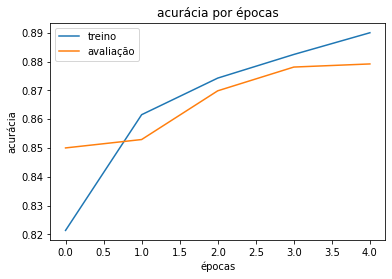

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','avaliação'])

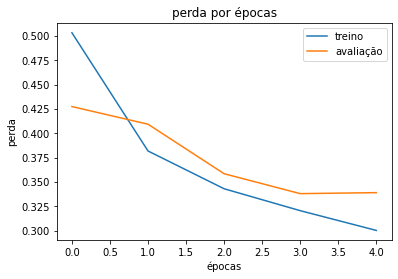

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino','avaliação'])

Como foi possível notar, incializar os pesos com zero não é a melhor opção, sendo assim podemos incializar os pesos com quaiquer números, ou seja, com números aleatórios

In [ ]:
pesos_da_camada_dense_aleatorios = np.random.rand(784, 256)
pesos_da_camada_dense_aleatorios

array([[0.41481761, 0.55262583, 0.02302169, ..., 0.19432277, 0.32488655,
        0.75177367],
       [0.70991132, 0.65943662, 0.4634881 , ..., 0.89184534, 0.69302684,
        0.34664145],
       [0.1309669 , 0.31778506, 0.3645839 , ..., 0.88795371, 0.27973996,
        0.42173053],
       ...,
       [0.95656839, 0.06192709, 0.24130215, ..., 0.36569645, 0.56103223,
        0.75105331],
       [0.23134442, 0.66054237, 0.36732492, ..., 0.75601495, 0.95871946,
        0.89345879],
       [0.46064939, 0.97378368, 0.02845366, ..., 0.79543785, 0.08475084,
        0.97207487]])

Agora podemos ver que os pessos estão de forma aleatória

In [ ]:
modelo.layers[1].set_weights([pesos_da_camada_dense_aleatorios, vieses_da_camada_dense])
modelo.layers[1].get_weights()

[array([[0.4148176 , 0.55262583, 0.02302169, ..., 0.19432276, 0.32488656,
         0.75177366],
        [0.70991135, 0.65943664, 0.4634881 , ..., 0.89184535, 0.69302684,
         0.34664145],
        [0.1309669 , 0.31778505, 0.3645839 , ..., 0.8879537 , 0.27973995,
         0.42173052],
        ...,
        [0.95656836, 0.06192709, 0.24130215, ..., 0.36569646, 0.56103224,
         0.75105333],
        [0.23134442, 0.66054237, 0.36732492, ..., 0.75601494, 0.95871943,
         0.8934588 ],
        [0.4606494 , 0.9737837 , 0.02845366, ..., 0.7954379 , 0.08475084,
         0.97207487]], dtype=float32),
 array([ 0.16182603,  0.03688628,  0.13780706,  0.22594665,  0.15565048,
        -0.23148802, -0.06149311,  0.2545399 , -0.01428161,  0.05093638,
         0.16909991,  0.09163439,  0.14832845,  0.02725017,  0.29016957,
         0.28512403, -0.01537404,  0.07361871,  0.10497025, -0.22086516,
         0.14939477,  0.28539696, -0.24988167,  0.03879045, -0.00729059,
         0.11980738,  0.41692

In [ ]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 19.0093 - accuracy: 0.6677 - val_loss: 3.8676 - val_accuracy: 0.7088
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 3.3699 - accuracy: 0.7486 - val_loss: 3.8564 - val_accuracy: 0.7363
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 3.9028 - accuracy: 0.7573 - val_loss: 5.5785 - val_accuracy: 0.6693
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 3.5222 - accuracy: 0.7769 - val_loss: 2.4739 - val_accuracy: 0.8017
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 3.6100 - accuracy: 0.7803 - val_loss: 2.8210 - val_accuracy: 0.7897


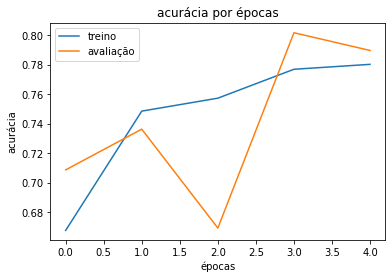

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','avaliação'])

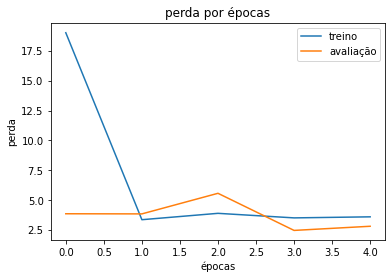

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino','avaliação'])

Com números aleatórios piorou a situação

Entendento o que o keras está fazendo para colocar os valores dos pesos

In [ ]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_5_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten_5',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_10',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'softmax',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bia

'kernel_initializer' é o lugar que informa o que está acontecendo com os pesos
o 'GlorotUniform' é um algorítmo que não coloca os pesos como zero e nem aleatórios, é um meio termo que evita os problemas que estavamos tendo

### zerando os vieses

In [ ]:
shape_vieses_da_camada_dense = vieses_da_camada_dense.shape
shape_vieses_da_camada_dense

(256,)

In [ ]:
vieses_da_camada_dense_zerados = np.zeros(shape_vieses_da_camada_dense)
vieses_da_camada_dense_zerados

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Vamos ver o que acontece quando se tem os pesos zerados e vieses zerados

In [ ]:
modelo.layers[1].set_weights([pesos_da_camada_dense_zerados, vieses_da_camada_dense_zerados])

In [ ]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3316 - accuracy: 0.1001 - val_loss: 2.3044 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3031 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.0995
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.0957


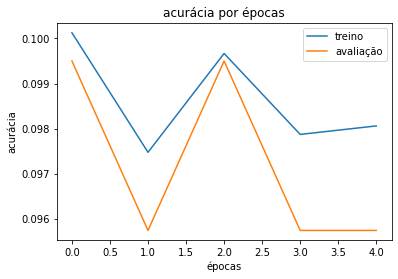

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino','avaliação'])

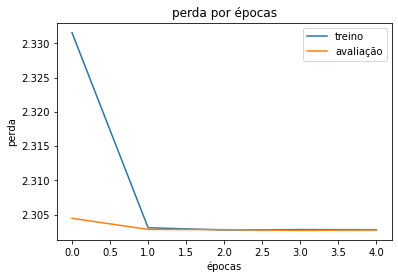

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino','avaliação'])

Sintetizando, os pesos conseguem separar melhor cada classificação de roupa no nosso modelo

a relu funciona assim:
saída = relu(multiplica(entrada, **peso**)+**vies**)
por isso não se pode colocar um viés muito grande nem muito pequeno, pois muito grande vai fazer a função ficar muito longe dos dados e muito pequeno irá fazer ela ter um overfit

Para o inglês:
output = activation(dot(input, **kernel**)+**bias**)

##Reduzindo as perdas
O Gradiente descendente é um algorítmo que faz com que o modelo encontre o lugar no qual a perda seja a menor possível

Em alusão com a física, se um skatista desce uma rampa ele irá ganhar velocidade, logo existirá um momento linear associado a ele. Se esse momento for muito grande ele irá descer passar do ponto mais baixo e subir novamente, descer... até parar no ponto mais baixo. O contrário acontece se esse momento for pequeno.
O mesmo acontece com o nosso modelo para achar o ponto onde se obtém a menor perda

No entanto não podemos confundir os mínimos locais com o global, portanto devemos usar o gradiente descendente estocástico (introduz aleatóriedade para o algorítmo aumentando a chançe de encontrar o mínimo global), além disso ele deixa o programa mais rápido para achar o mínimo global

Lembre-se que estamos usando um otimizador no programa, no entanto ele é o "adam" e não o estocástico

In [ ]:
adam = keras.optimizers.Adam(lr=0.001)
modelo.compile(optimizer=adam , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0948 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0983
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0995
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.0983


lr=0.001 (learning rate = taxa de aprendizado) é a taxa que o modelo aprende, se o número que ele recebe for muito maior que esse o modelo tentará aprender rápido (o momento será maior) e irá perder muita informação fazendo a perda ser maior 

Podemos reduzir o número de imagens pra treinar, assim vamos passar mais vezes por menos exemplos

In [ ]:
adam = keras.optimizers.Adam(lr=0.5)
modelo.compile(optimizer=adam , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)
modelo.fit(imagens_treino, identificacoes_treino,batch_size = 480, epochs=5, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1500/1500 [==============================] - 5s 3ms/step - loss: 2.3616 - accuracy: 0.0987 - val_loss: 2.3318 - val_accuracy: 0.0957
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3642 - accuracy: 0.0994 - val_loss: 2.3302 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3591 - accuracy: 0.0999 - val_loss: 2.3641 - val_accuracy: 0.1027
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3617 - accuracy: 0.0986 - val_loss: 2.3890 - val_accuracy: 0.1003
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3594 - accuracy: 0.1020 - val_loss: 2.3466 - val_accuracy: 0.0995
Epoch 1/5
100/100 [==============================] - 2s 14ms/step - loss: 2.3123 - accuracy: 0.1004 - val_loss: 2.3092 - val_accuracy: 0.0983
Epoch 2/5
100/100 [==============================] - 1s 13ms/step - loss: 2.3075 - accuracy: 0.0988 - val_loss: 2.3057 - val_accuracy: 0.1003
Epoch 3/5
1

Podemos ver que não houve melhora, porém o tempo para treino é bem menor, logo esse hiperparâmetro ajuda a deixar o modelo mais rápido

In [ ]:
adam = keras.optimizers.Adam(lr=0.002)
modelo.compile(optimizer=adam , loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)
modelo.fit(imagens_treino, identificacoes_treino,batch_size = 480, epochs=5, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1500/1500 [==============================] - 5s 3ms/step - loss: 2.3035 - accuracy: 0.0953 - val_loss: 2.3027 - val_accuracy: 0.1003
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3030 - accuracy: 0.0986 - val_loss: 2.3027 - val_accuracy: 0.1013
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.0994 - val_loss: 2.3032 - val_accuracy: 0.0957
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3029 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.1013
Epoch 1/5
100/100 [==============================] - 2s 14ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3028 - val_accuracy: 0.1013
Epoch 2/5
100/100 [==============================] - 1s 13ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 3/5
1

Ele ficou mais rápido e também mais preciso